In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
df=pd.read_csv("TSLA.csv")
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


Epoch 1/300
740/740 [==============================] - 67s 90ms/step - loss: 0.0771
Epoch 2/300
740/740 [==============================] - 69s 93ms/step - loss: 0.0161
Epoch 3/300
740/740 [==============================] - 70s 95ms/step - loss: 0.0126
Epoch 4/300
740/740 [==============================] - 96s 130ms/step - loss: 0.0119
Epoch 5/300
740/740 [==============================] - 70s 95ms/step - loss: 0.0120
Epoch 6/300
740/740 [==============================] - 81s 110ms/step - loss: 0.0105
Epoch 7/300
740/740 [==============================] - 71s 96ms/step - loss: 0.0122
Epoch 8/300
740/740 [==============================] - 63s 85ms/step - loss: 0.0112
Epoch 9/300
740/740 [==============================] - 62s 84ms/step - loss: 0.0116
Epoch 10/300
740/740 [==============================] - 81s 110ms/step - loss: 0.0100
Epoch 11/300
740/740 [==============================] - 55s 74ms/step - loss: 0.0098
Epoch 12/300
740/740 [==============================] - 66s 90ms/step -

740/740 [==============================] - 58s 78ms/step - loss: 0.0035
Epoch 98/300
740/740 [==============================] - 46s 62ms/step - loss: 0.0040
Epoch 99/300
740/740 [==============================] - 50s 68ms/step - loss: 0.0031
Epoch 100/300
740/740 [==============================] - 48s 65ms/step - loss: 0.0031
Epoch 101/300
740/740 [==============================] - 70s 94ms/step - loss: 0.0032
Epoch 102/300
740/740 [==============================] - 31s 42ms/step - loss: 0.0031
Epoch 103/300
740/740 [==============================] - 37s 50ms/step - loss: 0.0028
Epoch 104/300
740/740 [==============================] - 41s 56ms/step - loss: 0.0035
Epoch 105/300
740/740 [==============================] - 44s 59ms/step - loss: 0.0037
Epoch 106/300
740/740 [==============================] - 51s 69ms/step - loss: 0.0033
Epoch 107/300
740/740 [==============================] - 50s 67ms/step - loss: 0.0029
Epoch 108/300
740/740 [==============================] - 47s 64ms/step

740/740 [==============================] - 37s 50ms/step - loss: 0.0019
Epoch 193/300
740/740 [==============================] - 39s 53ms/step - loss: 0.0020
Epoch 194/300
740/740 [==============================] - 43s 58ms/step - loss: 0.0020
Epoch 195/300
740/740 [==============================] - 44s 59ms/step - loss: 0.0019
Epoch 196/300
740/740 [==============================] - 41s 55ms/step - loss: 0.0020
Epoch 197/300
740/740 [==============================] - 42s 57ms/step - loss: 0.0021
Epoch 198/300
740/740 [==============================] - 46s 62ms/step - loss: 0.0018
Epoch 199/300
740/740 [==============================] - 45s 61ms/step - loss: 0.0019
Epoch 200/300
740/740 [==============================] - 42s 57ms/step - loss: 0.0019
Epoch 201/300
740/740 [==============================] - 44s 59ms/step - loss: 0.0020
Epoch 202/300
740/740 [==============================] - 42s 57ms/step - loss: 0.0019
Epoch 203/300
740/740 [==============================] - 46s 62ms/st

740/740 [==============================] - 47s 64ms/step - loss: 0.0016
Epoch 288/300
740/740 [==============================] - 48s 65ms/step - loss: 0.0018
Epoch 289/300
740/740 [==============================] - 53s 71ms/step - loss: 0.0019
Epoch 290/300
740/740 [==============================] - 52s 70ms/step - loss: 0.0017
Epoch 291/300
740/740 [==============================] - 79s 107ms/step - loss: 0.0019
Epoch 292/300
740/740 [==============================] - 33s 44ms/step - loss: 0.0020
Epoch 293/300
740/740 [==============================] - 30s 41ms/step - loss: 0.0020
Epoch 294/300
740/740 [==============================] - 31s 42ms/step - loss: 0.0017
Epoch 295/300
740/740 [==============================] - 38s 51ms/step - loss: 0.0017
Epoch 296/300
740/740 [==============================] - 43s 58ms/step - loss: 0.0017
Epoch 297/300
740/740 [==============================] - 42s 57ms/step - loss: 0.0017
Epoch 298/300
740/740 [==============================] - 47s 63ms/s

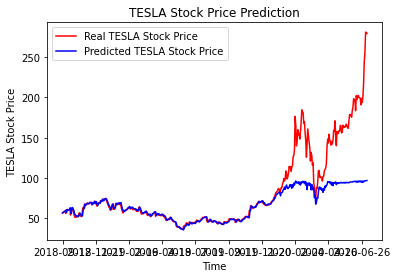

In [4]:
if __name__ == "__main__":
    # Q2：split (training [0：800] test [801:1259])
    training_set = df.iloc[:800, 1:2].values
    test_set = df.iloc[800:, 1:2].values

    # Feature Scaling
    sc = MinMaxScaler(feature_range = (0, 1))
    training_set_scaled = sc.fit_transform(training_set)

    # Creating a data structure with 60 time-steps and 1 output
    X_train = []
    y_train = []
    for i in range(60, 800):
        # Q3:change the time lags(1days=i-60, 7days=i-53 ,14days=i-46)
        X_train.append(training_set_scaled[i - 60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    model = Sequential()
    # Q4：LSTM model: 4 layer, neuron=50,loss function=mean_squared_error,optimizer=adam
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Result2:epochs=100/300 batch_size=32/8
    model.fit(X_train, y_train, epochs = 300, batch_size = 32)
    # Getting the predicted stock price of 2017
    dataset_train = df.iloc[:800, 1:2]
    dataset_test = df.iloc[800:, 1:2]
    dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
    inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = sc.transform(inputs)

    X_test = []
    for i in range(60, 519):
        # Q3:change the time lags(1days=i-60, 7days=i-53 ,14days=i-46)
        X_test.append(inputs[i-60:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Result2:Visualising the results
    plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
    plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
    plt.xticks(np.arange(0,459,50))
    plt.title('TESLA Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('TESLA Stock Price')
    plt.legend()
    plt.show()